In [1]:
from matplotlib import pyplot as plt

from loki.libloki.configs import PulsarSearchConfig
from loki.search import ffa_search
from pyloki.config import ParamLimits
from pyloki.simulation.pulse import PulseSignalConfig

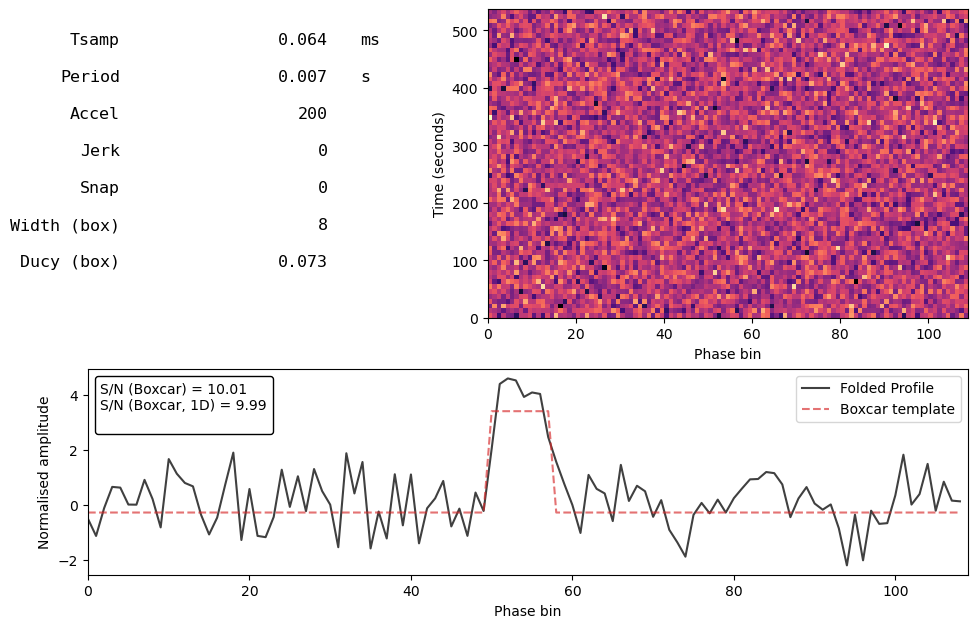

In [2]:
pulsar_period = 0.007
dt = 64e-6
accel = 200
nsamps = 2**23
mod_kwargs = {"acc": accel}
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, nsamps=nsamps, snr=10, ducy=0.1,
                        mod_kwargs=mod_kwargs)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [8]:
tol_bins = 2 #cfg.tol_bins
fold_bins = 64 # cfg.fold_bins_ideal
p = ParamLimits.from_upper([accel, cfg.freq], (-accel * 10, accel * 10), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 256
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, nthreads=8, use_fft_shifts=True)
ffa_plan, pgram = ffa_search(tim_data, search_cfg)

Param limits: [(np.float64(-2000.0), np.float64(2000.0)), (np.float64(142.60131305714359), np.float64(143.11297265714214))]
[2025-07-02 14:42:27.589] [info] PulsarSearchConfigClass: nsamps=8388608, tsamp=6.4e-05, nbins=64, tol_bins=2, ducy_max=0.2, wtsp=1.5, prune_poly_order=3, prune_n_derivs=3, bseg_brute=32768, bseg_ffa=8388608, use_fft_shifts=false, branch_max=16, nthreads=8
[2025-07-02 14:42:33.669] [info] FFA Memory Usage: 4.61 GB (1 buffers)
[2025-07-02 14:42:34.397] [info] FFA::execute started
[2025-07-02 14:42:34.398] [info] FFA::initialize started
[2025-07-02 14:42:34.422] [info] FFA::initialize took 24 ms
[2025-07-02 14:42:35.238] [info] FFA::execute took 840 ms


Computing FFA... ━━━━━━��━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% :00s<00m:00s] 


In [9]:
print(pgram.get_indices_summary(true_values={"accel": cfg.mod_kwargs["acc"], "freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (1210, 2197)
Best param indices: (np.int64(1210), np.int64(2197), np.int64(3))
Best S/N: 8.24
Best Period: 0.007
Best accel: 199.8183469573115
Best freq: 142.85714285714286
Best width: 4


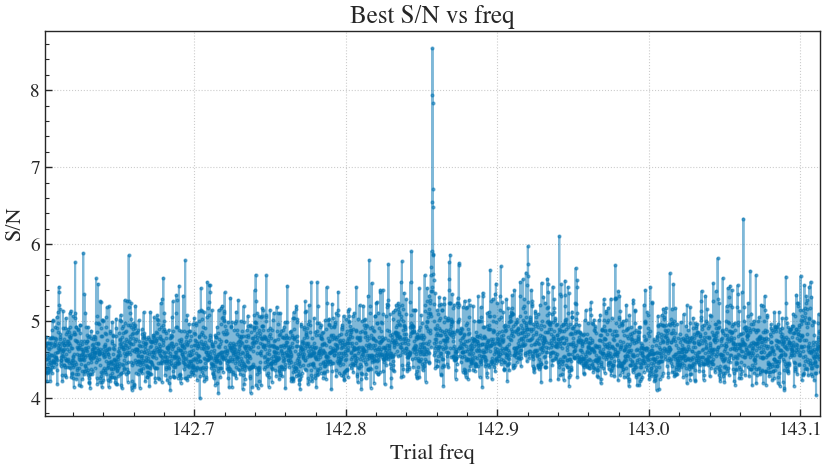

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

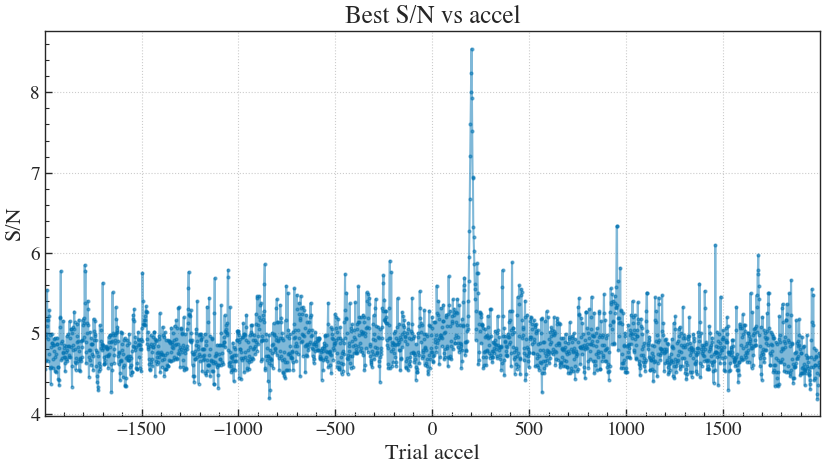

In [6]:
fig = pgram.plot_1d("accel", figsize=(10, 5))
plt.show()

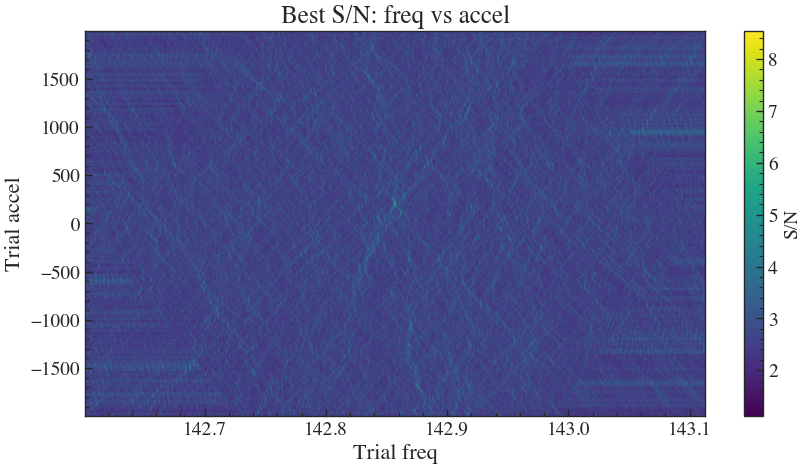

In [7]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()